In [7]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install gtts


Note: you may need to restart the kernel to use updated packages.


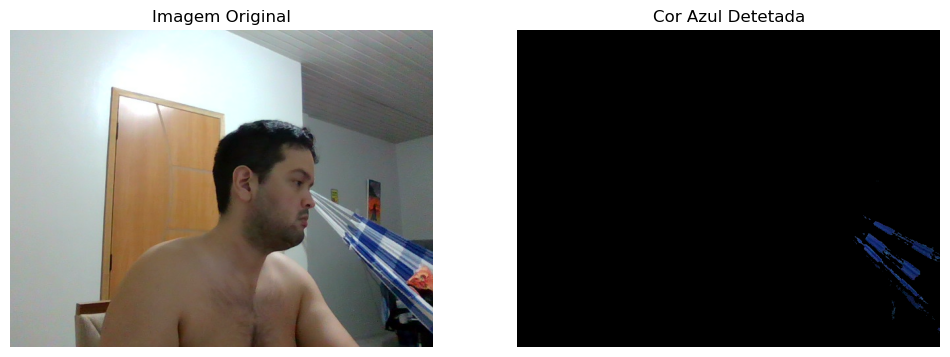

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from gtts import gTTS
from IPython.display import Audio, display

# Função para detectar a cor predominante em tempo real
def detect_colors_and_speak_real_time():
    # Captura da webcam
    cap = cv2.VideoCapture(0)

    total_frames = 0

    while True:
        # Captura de um frame
        ret, frame = cap.read()

        if not ret:
            print("Falha ao capturar imagem da webcam.")
            break
        
        # Converte a imagem de BGR para HSV
        hsv_image = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Define intervalos de cores no espaço HSV
        # Azul
        lower_blue = np.array([100, 150, 50])
        upper_blue = np.array([140, 255, 255])

        # Verde
        lower_green = np.array([35, 100, 50])
        upper_green = np.array([85, 255, 255])

        # Vermelho (um único intervalo)
        lower_red = np.array([0, 120, 70])
        upper_red = np.array([10, 255, 255])

        # Cria máscaras para as cores
        mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)
        mask_green = cv2.inRange(hsv_image, lower_green, upper_green)
        mask_red = cv2.inRange(hsv_image, lower_red, upper_red)

        # Aplica as máscaras na imagem original para isolar as cores
        blue_shirt = cv2.bitwise_and(frame, frame, mask=mask_blue)
        green_shirt = cv2.bitwise_and(frame, frame, mask=mask_green)
        red_shirt = cv2.bitwise_and(frame, frame, mask=mask_red)

        # Verificar a cor predominante
        if np.sum(mask_blue) > np.sum(mask_green) and np.sum(mask_blue) > np.sum(mask_red):
            color = "azul"
            detected_image = blue_shirt
        elif np.sum(mask_green) > np.sum(mask_red):
            color = "verde"
            detected_image = green_shirt
        else:
            color = "vermelho"
            detected_image = red_shirt

        total_frames += 1

        # Exibe somente o quarto frame
        if total_frames == 4:
            # Exibe a imagem original e a imagem filtrada lado a lado usando matplotlib
            plt.figure(figsize=(12, 6))

            # Imagem original
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title("Imagem Original")
            plt.axis('off')

            # Imagem filtrada com a cor detectada
            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))
            plt.title(f"Cor {color.capitalize()} Detetada")
            plt.axis('off')

            # Exibe as imagens
            plt.show()

            # Gerar áudio com o nome da cor
            tts = gTTS(f"A cor detectada é {color}", lang='pt')
            tts.save("color.mp3")

            # Reproduzir o áudio automaticamente
            display(Audio("color.mp3", autoplay=True))

            # Sai do loop após o quarto frame
            break

        # Espera 1 segundo antes de capturar o próximo frame
        time.sleep(1)
        
    # Libera a captura e fecha as janelas
    cap.release()

# Detectar cores em tempo real
detect_colors_and_speak_real_time()